<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab08.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lab 08 - A/B Testing

## References

* [Sections 12.0 - 12.3 of the Textbook](https://ccsf-math-108.github.io/textbook/chapters/12/Comparing_Two_Samples.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Code Reference](https://ccsf-math-108.github.io/materials-sp25/resources/code-reference.html)

---

## Lab Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your tasks are categorized as auto-graded (📍) and manually graded (📍🔎):
    - **For all auto-graded tasks:**
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to execute tests on your code.
        - There are no hidden auto-grader tests in the lab assignments. This means if you pass the tests, you can assume you've completed the task successfully.
    - **For all manually graded tasks:**
        - You may need to provide your own response to the provided prompt. Replace the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or another output using code. Replace the `...` in the code cell to generate the image, table, etc.
        - In either case, check your response with a classmate, a tutor, or the instructor before moving on.
- Throughout this assignment and all future ones, please **do not re-assign variables** throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you may fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- **Collaborating on labs is encouraged!** You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) However, please don't just share answers.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## A/B Testing

---

A/B testing is a form of hypothesis testing that allows you to make comparisons between two distributions. We may also refer to an A/B test as a permutation test.

You'll almost never be explicitly asked to perform an A/B test. Make sure you can identify situations where the test is appropriate and know how to correctly implement each step. Oftentimes, we use an A/B test to determine whether or not two samples came from the same underlying distribution.

---

### Task 01 📍

The following statements are the steps of an A/B hypothesis test presented in a random order:

1. Choose a test statistic (typically the difference in means between two categories)
1. Shuffle the labels of the original sample, find your simulated test statistic, and repeat many times
1. Find the value of the observed test statistic
1. Calculate the p-value based on your observed and simulated test statistics
1. Define a null and alternate model
1. Use the p-value and p-value cutoff to draw a conclusion about the null hypothesis

Assign `ab_test_order` to an array of integers that contains the correct order of an A/B test, where the first item of the array is the first step of an A/B test and the last item of the array is the last step of an A/B test.

In [ ]:
ab_test_order = np.array([5,1,3,2,4,6])
ab_test_order

array([5, 1, 3, 2, 4, 6])

In [ ]:
grader.check("task_01")

task_01 results: All test cases passed!
task_01 - 1 message: ✅ ab_test_order has 6 elements.
task_01 - 2 message: ✅ All of the first 3 values in ab_test_order seem possible.
task_01 - 3 message: ✅ All of the last 3 values in ab_test_order seem possible.
task_01 - 4 message: ✅ ab_test_order seems correct.

---

## The Great British Bake Off

---

>"The Great British Bake Off (often abbreviated to Bake Off or GBBO) is a British television baking competition, produced by Love Productions, in which a group of amateur bakers compete against each other in a series of rounds, attempting to impress a group of judges with their baking skills" [Source: Wikipedia](https://en.wikipedia.org/wiki/The_Great_British_Bake_Off)

For every week of the competition, the judges assign one contestant the title "Star Baker". Ultimately, one winner is crowned every season. Using this information, we would like to investigate how winning Star Baker awards affects the odds of winning a season of the show.

---

## Task 02 📍🔎

<!-- BEGIN QUESTION -->

We want to know whether winning more Star Baker awards causes a change in likelihood of winning the season. Why is it not sufficient to compare star baker rates for winners and losers?

_Check your response with someone else before moving on._

It is not sufficient to compare Star Baker rates for winners and losers because this ignores potential confounding factors

<!-- END QUESTION -->

---

We are going to run the following hypothesis test to determine the association between winning and number of Star Baker awards. The population we are examining is every contestant from seasons 2 through 11 of GBBO. We are going to use the following null and alternative hypotheses:

**Null hypothesis:** The distribution of Star Baker awards between contestants who won their season and contestants who did not win their season is the same.

**Alternative hypothesis:** Contestants who win their season of the show will win more Star Baker awards on average.

Our alternative hypothesis is related to our suspicion that contestants who win more Star Baker awards are more skilled, so they are more likely to win the season.

The `bakers` table below describes the number of star baker awards each contest won and whether or not they won their season (`1` if they won, `0` if they did not win). The data was manually aggregated from Wikipedia for seasons 2-11 of the show. We randomized the order of rows as to not spoil the outcome of the show.

In [ ]:
bakers = Table.read_table("star_bakers.csv")
bakers.show(3)

star baker awards,won
3,1
0,0
1,0


---

## Task 03 📍

Create a new table called `means` that contains the mean number of star baker awards for bakers who did not win (`won==0`) and bakers that did win (`won==1`). The table should have the column names `won` and `star baker awards mean`.

In [ ]:
means =bakers.group('won',np.mean)
means


won,star baker awards mean
0,0.651786
1,1.5


In [ ]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your table has 2 rows.
task_03 - 2 message: ✅ Your labels seem correct.
task_03 - 3 message: ✅ Your mean values seem correct.

---

## Task 04 📍🔎

<!-- BEGIN QUESTION -->

Visualize the distribution of Star Baker awards for winners and non-winners as overlaid histograms. Make sure to:

* Use the bins we provided.
* Use the group argument of `tbl.hist`. In order to produce several overlayed histograms based on unique values in a given column, we can do something like `tbl.hist(..., group=<col_name>, bins=...)`!

_We recommend that you check your histogram with someone before moving on._

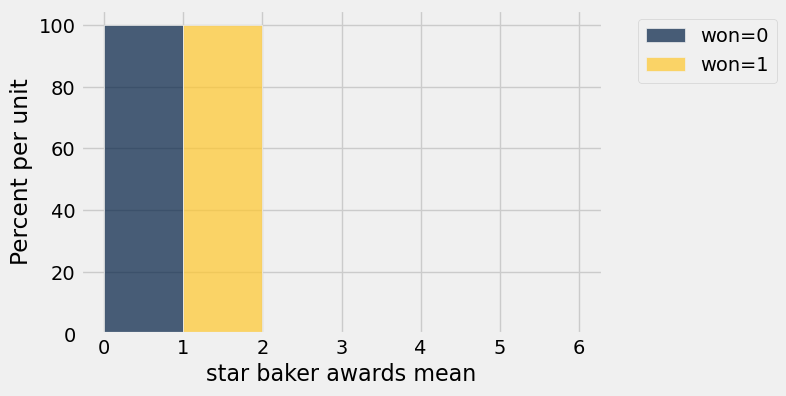

In [ ]:
useful_bins = np.arange(0, 7)
means.hist('star baker awards mean',group='won',bins=useful_bins)

<!-- END QUESTION -->

---

## Task 05 📍🔎

<!-- BEGIN QUESTION -->

We want to figure out if there is a difference between the distribution of Star Baker awards between winners and non winners. For the test statistic, subtract the mean star baker awards value for those that didn't win from the mean value for those that did win.

Which values of this test statistic support the alternative hypothesis?

_Before moving on, confirm your answer with someone._

In [ ]:
abs(0.651786-1.5)

0.848214

The test statistic of 0.848214, which represents the difference in mean Star Baker awards between winners and non-winners, supports the alternative hypothesis if it is larger than most values from the simulated null distribution, indicating that winners tend to win more Star Baker awards on average.

<!-- END QUESTION -->

---

## Task 06 📍

Set `observed_difference` to the observed test statistic using the `means` table.

In [ ]:
observed_difference = abs(means.column(1).item(0)-means.column(1).item(1))
observed_difference

0.8482142857142857

In [ ]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your observed_difference value is a float.
task_06 - 2 message: ✅ Your observed_difference value seems correct.

---

## Task 07 📍

Shortly, you will be calculating that difference on a variety of tables similar to `bakers`, but with the mean values shuffled around. Given a table like `bakers`, a label column `label_col` with two labels, `1` and `0`, and a values column `val_col`, write a function `find_test_stat` that calculates the test statistic outlined above.

*Hint*: Make sure that you are taking the directionality of our alternative hypothesis into account.

In [ ]:
def find_test_stat(tbl,label_col, val_col):
    means_table=tbl.group(label_col,np.mean)
    return means_table.column('star baker awards mean').item(1)-means_table.column('star baker awards mean').item(0)


find_test_stat(bakers,'won', 'star baker awards')

0.8482142857142857

In [ ]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ It seems like your function correctly produces the same observed value as in the previous task.
task_07 - 2 message: ✅ It seems like your function is using the arguments tbl, label_col, val_col to do the calculation.

---

When we run a simulation for A/B testing, we resample by **shuffling the labels** of the original sample. If the null hypothesis is true and the star baker award distributions are the same, we expect that the difference in mean star baker awards to not change when `"won"` labels are changed.

---

## Task 08 📍

Write a function `simulate_and_test_statistic` to compute one trial of our A/B test. Your function should run a simulation and return a test statistic.

In [ ]:
def simulate_and_test_statistic(tbl, labels_col, values_col):
    shuffled_labels = tbl.sample(with_replacement=False).column(labels_col)

    # Create a new table with the shuffled labels
    shuffled_tbl = tbl.with_column('Shuffled Labels', shuffled_labels)

    # Group by the shuffled labels and calculate the mean of the values column
    means_table = shuffled_tbl.group('Shuffled Labels', np.mean)

    return find_test_stat(shuffled_tbl,'Shuffled Labels',values_col)


# Example usage:
simulate_and_test_statistic(bakers, "won", "star baker awards")


0.08571428571428574

In [ ]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ Your test_stat value is between -2 and 2.
task_08 - 2 message: ✅ simulate_and_test_statistic seems to work for the table we checked.

---

## Task 09 📍

Simulate 5000 trials of our A/B test and store the test statistics in an array called `differences`. Once complete, this code cell will take a few minutes to run.

In [ ]:

repetitions = 5000
differences = make_array()

# Run the simulation for 5000 trials
for _ in range(repetitions):
    # Simulate a single trial and get the test statistic
    trial_stat = simulate_and_test_statistic(bakers, "won", "star baker awards")
    differences = np.append(differences, trial_stat)


differences


array([ 0.08571429, -0.24107143,  0.19464286, ..., -0.45892857,
        0.08571429, -0.24107143])

In [ ]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ differences has 5000 items.
task_09 - 2 message: ✅ On average, your test statistic should is close to 0
task_09 - 3 message: ✅ All of the test statistics are different

Run the cell below to view a histogram of your simulated test statistics plotted with your observed test statistic.

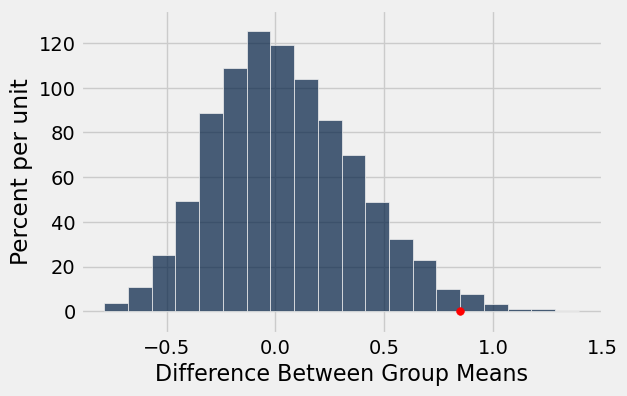

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist(bins=20)
plt.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plt.ylim(-0.1, 1.35);

---

## Task 10 📍

Find the p-value for your test and assign it to `empirical_p`.

In [ ]:
empirical_p= np.count_nonzero(differences >= observed_difference) / len(differences)

empirical_p

0.0144

In [ ]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ Your p-value should be less than 5%.

---

## Task 11 📍🔎

<!-- BEGIN QUESTION -->

1. Using a 5% p-value cutoff, draw a conclusion about the null and alternative hypotheses using more the technical language of hypothesis testing.
2. Using simple, non-technical language, what does your analysis tell you about the association between star baker awards and winning?
3. What can you claim about causation from your statistical analysis?
    
Confirm your answer with a peer, instructor, etc.

Using a 5% p-value cutoff, if the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference between the distribution of Star Baker awards for winners and non-winners, suggesting that winning more Star Baker awards is associated with a higher likelihood of winning the season


<!-- END QUESTION -->

---

## Submit Your Assignment to Canvas

Follow these steps to submit your lab assignment:

1. **Check the Assignment Completion Requirements:** This assignment is scored as Complete or Incomplete. Make sure to check with your instructor about their requirements for a Complete score.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download HTML` to download the HTML version (`.html`) of this notebook.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.html` file.

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

task_01 results: All test cases passed!
task_01 - 1 message: ✅ ab_test_order has 6 elements.
task_01 - 2 message: ✅ All of the first 3 values in ab_test_order seem possible.
task_01 - 3 message: ✅ All of the last 3 values in ab_test_order seem possible.
task_01 - 4 message: ✅ ab_test_order seems correct.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your table has 2 rows.
task_03 - 2 message: ✅ Your labels seem correct.
task_03 - 3 message: ✅ Your mean values seem correct.

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your observed_difference value is a float.
task_06 - 2 message: ✅ Your observed_difference value seems correct.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ It seems like your function correctly produces the same observed value as in the previous task.
task_07 - 2 message: ✅ It seems like your function is using the arguments tbl, label_col, val_col to do the calculation.

task_08 results: All test cases passed!
task_0